In [1]:
import folium
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from folium import plugins
from shapely.geometry import Point

from src.config import DADOS_LIMPOS, DADOS_GEO_MEDIAN, DADOS_GEO_ORIGINAIS
from src.graficos import PALETTE, SCATTER_ALPHA

sns.set_theme(style="white", palette="bright")

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  floa

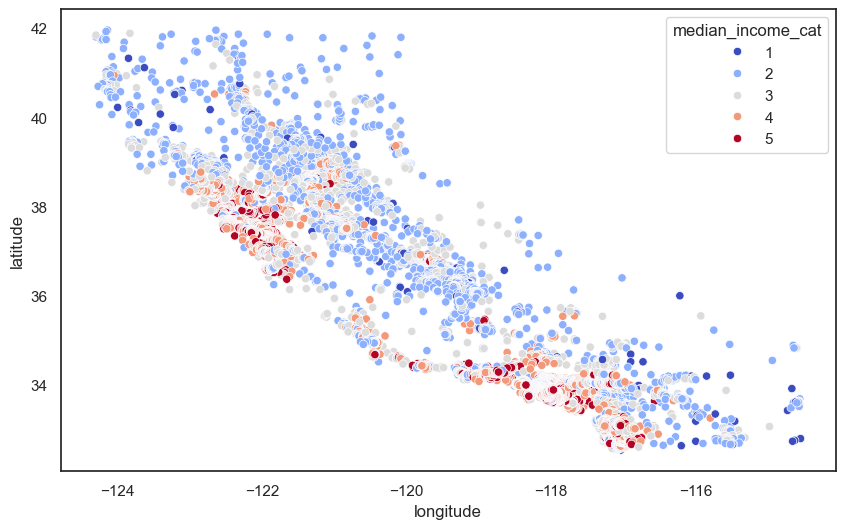

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, x='longitude', y='latitude', ax=ax, alpha=1, hue='median_income_cat', palette=PALETTE)

plt.show()

Como foi visto no arquivo `01-fb-eda.ipynb` existe uma forte correlação positiva entre o Salário e o Preço das casas.

Segundo o que o gráfico apresenta, aparentemente casas próximas ao oceano tendem a ter moradores com salários maiores, e consequentemente casas com preços mais altos, tendo em vista a forte correlação já mencionada. E sim, há evidências que sugerem que casas próximas ao oceano na Califórnia tendem a ter valores mais altos. Isso ocorre devido a fatores como a localização privilegiada, vistas panorâmicas, clima agradável e a demanda por propriedades costeiras.

Isso nos mostra mais uma vez a importância da variável "median_income" para determinar o **preço**.

### A partir daqui criaremos gráficos mais intuitivos


In [5]:
gdf_counties = gpd.read_file(DADOS_GEO_ORIGINAIS)

gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18..."
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933..."
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9..."
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7..."
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3..."


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216


In [7]:
# Obtendo os pontos relativos a longitude e latitude eu um formato mais adequado, onde o GeoPandas vai entender
pontos = [Point(long, lat) for long, lat in zip(df["longitude"], df["latitude"])]

pontos[:5]

[<POINT (-122.23 37.88)>,
 <POINT (-122.22 37.86)>,
 <POINT (-122.26 37.84)>,
 <POINT (-122.26 37.85)>,
 <POINT (-122.26 37.84)>]

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=pontos)

gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88)
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86)
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84)
3,-122.260002,37.849998,50,1120,283,697,264,2.1250,140000,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26 37.85)
4,-122.260002,37.840000,50,2239,455,990,419,1.9911,158700,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26 37.84)


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-nu

In [10]:
# Sistema de referência dos pontos do DF original
gdf = gdf.set_crs(epsg=4326)

# Sistema de referência dos Condados obtidos na internet via JSON
gdf_counties = gdf_counties.to_crs(epsg=4326)

In [11]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdf_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins

https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

In [13]:
# Relacionando os pontos(gdf) com as regiões(condados, gdf_counties), da esquerda para a direita.
gdf_joined = gpd.sjoin(gdf, gdf_counties, how="left", predicate="within")

gdf_joined.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,rooms_per_household,population_per_household,bedrooms_per_room,geometry,index_right,name,fullname,abbrev,abcode,ansi
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,...,6.984127,2.555556,0.146591,POINT (-122.23 37.88),34.0,Alameda,Alameda County,ALA,c001,001
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,...,6.238137,2.109842,0.155797,POINT (-122.22 37.86),34.0,Alameda,Alameda County,ALA,c001,001
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,...,4.294117,2.026891,0.260274,POINT (-122.26 37.84),34.0,Alameda,Alameda County,ALA,c001,001


In [14]:
gdf_counties.iloc[12]

name                                                     Yuba
fullname                                          Yuba County
abbrev                                                    YUB
abcode                                                   c058
ansi                                                      115
geometry    POLYGON ((-121.01794117107198 39.5919167593742...
Name: 12, dtype: object

In [15]:
# Algumas colunas são desnecessárias, pelo menos para o nosso objetivo, então vamos remove-las
gdf_joined = gdf_joined.drop(
    columns=["index_right", "fullname", "abcode", "ansi"]
)

gdf_joined.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
0,-122.230003,37.880001,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23 37.88),Alameda,ALA
1,-122.220001,37.860001,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22 37.86),Alameda,ALA
2,-122.260002,37.840000,42,2555,665,1206,595,2.0804,226700,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26 37.84),Alameda,ALA


In [16]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17564 entries, 0 to 17563
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float32 
 1   latitude                  17564 non-null  float32 
 2   housing_median_age        17564 non-null  int8    
 3   total_rooms               17564 non-null  int16   
 4   total_bedrooms            17564 non-null  int16   
 5   population                17564 non-null  int16   
 6   households                17564 non-null  int16   
 7   median_income             17564 non-null  float32 
 8   median_house_value        17564 non-null  int32   
 9   ocean_proximity           17564 non-null  category
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float32 
 12  population_per_household  17564 non-null  float32 
 13  bedrooms_per_room         17564 non-null  f

Há algumas linhas com valores nulos nas colunas que vieram do `gdf_counties`, provavelmente está relacionado ao fato de que alguns pontos o GeoPandas não conseguiu associar as respectivas regiões.

In [17]:
gdf_joined.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
median_income_cat             0
rooms_per_household           0
population_per_household      0
bedrooms_per_room             0
geometry                      0
name                        148
abbrev                      148
dtype: int64

In [18]:
gdf_joined[gdf_joined.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
1507,-124.300003,41.799999,19,2672,552,1298,478,1.9797,85800,NEAR OCEAN,2,5.589958,2.715481,0.206587,POINT (-124.3 41.8),NaN,NaN
1508,-124.230003,41.750000,11,3159,616,1343,479,2.4805,73200,NEAR OCEAN,2,6.594990,2.803758,0.194998,POINT (-124.23 41.75),NaN,NaN
1511,-124.220001,41.730000,28,3003,699,1530,653,1.7038,78300,NEAR OCEAN,2,4.598775,2.343032,0.232767,POINT (-124.22 41.73),NaN,NaN
1517,-124.300003,41.840000,17,2677,531,1244,456,3.0313,103600,NEAR OCEAN,3,5.870614,2.728070,0.198356,POINT (-124.3 41.84),NaN,NaN
1521,-119.940002,38.959999,20,1451,386,467,255,1.5536,212500,INLAND,2,5.690196,1.831372,0.266023,POINT (-119.94 38.96),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,-119.300003,34.270000,17,1527,503,688,423,1.6007,187500,NEAR OCEAN,2,3.609929,1.626478,0.329404,POINT (-119.3 34.27),NaN,NaN
17199,-119.290001,34.259998,32,3295,764,1344,600,3.6007,395500,NEAR OCEAN,3,5.491667,2.240000,0.231866,POINT (-119.29 34.26),NaN,NaN
17201,-119.290001,34.230000,22,2486,608,709,523,2.9018,275000,NEAR OCEAN,2,4.753346,1.355641,0.244570,POINT (-119.29 34.23),NaN,NaN
17232,-119.230003,34.150002,18,6213,1188,2679,1000,3.7480,380400,NEAR OCEAN,3,6.213000,2.679000,0.191212,POINT (-119.23 34.15),NaN,NaN


Se formos no Google Maps e manualmente tentarmos verificar um ponto específico usando a latitude e longitude da base original que possui valor nulo nas colunas "name" e "abbrev", vamos perceber que o ponto cai no oceano, talvez seja por isso que o GeoPandas não conseguiu associa-lo a algum condado. Isso provavelmente se deve ao fato de que essa base do Kaggle que estamos usando é de um censo de 1990, talvez os equipamentos não eram tão precisos, porém o mais provável é que a forma como essa base foi construída acabou comprometendo a precisão das coordenadas, pois ela é resultado de uma agregação das casas que foram visitadas, de certa forma a longitude e latitude também são resultados dessas agregações.

- Nesse caso vamos tentar dizer ao GeoPandas para associar esses pontos ao condado mais próximo

In [19]:
# Obtendo apenas os indíces que iremos tratar
linhas_faltantes = gdf_joined[gdf_joined.isnull().any(axis=1)].index

linhas_faltantes

Index([ 1507,  1508,  1511,  1517,  1521,  2154,  2193,  2201,  2203,  2219,
       ...
       15747, 15748, 15752, 15755, 15756, 17198, 17199, 17201, 17232, 17258],
      dtype='int64', length=148)

Para introduzir os pontos nos condados mais próximos utilizaremos o conceito de `centroides` do GeoPandas.

In [20]:
gdf_counties["centroid"] = gdf_counties.centroid

gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18...",POINT (-122.54047 41.59268)
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89681 41.74299)
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72517 41.58987)
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11264 40.65063)
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04016 40.76344)


In [21]:
# Quantidade de condados
gdf_counties.shape

(58, 7)

In [22]:
# Visualização de um ponto específico que tem valores nulos nas colunas de interesse.
gdf_joined.loc[1507]

longitude                                                     -124.300003
latitude                                                        41.799999
housing_median_age                                                     19
total_rooms                                                          2672
total_bedrooms                                                        552
population                                                           1298
households                                                            478
median_income                                                      1.9797
median_house_value                                                  85800
ocean_proximity                                                NEAR OCEAN
median_income_cat                                                       2
rooms_per_household                                              5.589958
population_per_household                                         2.715481
bedrooms_per_room                     

In [23]:
# Visualizando a localização geométrica desse respectivo ponto
print(gdf_joined.loc[1507, "geometry"])

POINT (-124.30000305175781 41.79999923706055)


In [24]:
# Obtendo a distância desse respectivo ponto em relação aos centróides de cada condado(58).
gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"])

0      1.771700
1      0.407204
2      3.581004
3      1.652539
4      2.486229
5      3.872982
6      1.181051
7      2.658962
8      3.899362
9      3.440403
10     2.913231
11     4.386820
12     3.885950
13     3.111850
14     4.326303
15     3.336570
16     2.528645
17     3.799275
18     4.508214
19     4.834879
20     3.930031
21     5.506539
22     3.568571
23     3.837241
24     4.467937
25     6.649118
26     4.955842
27     4.248938
28     5.192143
29     5.754299
30     4.910558
31     4.069320
32     4.533433
33     5.374753
34     4.784590
35     6.091522
36     6.448327
37     4.438089
38     4.775127
39     5.836867
40     6.858891
41     5.258028
42     8.685359
43     5.271193
44     6.114297
45     7.834746
46     7.271996
47     6.366951
48    10.694858
49     8.527644
50     7.503716
51     9.007875
52     8.314811
53    11.571357
54    10.407882
55    12.512826
56     9.633791
57    11.578843
dtype: float64

In [25]:
# Nosso interesse é o índice do centróide(condado) mais próximo desse ponto.
gdf_counties["centroid"].distance(gdf_joined.loc[1507, "geometry"]).idxmin()

1

In [26]:
# No GeoDataframe do condado, utilizando o índice conseguimos saber qual é o condado mais próximo desse ponto
gdf_counties.loc[1]

name                                                Del Norte
fullname                                     Del Norte County
abbrev                                                    DNT
abcode                                                   c008
ansi                                                      015
geometry    MULTIPOLYGON (((-124.19097394913307 41.7361877...
centroid       POINT (-123.89681032594169 41.742987539381424)
Name: 1, dtype: object

In [27]:
# Definindo uma função que faz essas checagens para cada ponto que ainda não tem um condado associado.
def condado_mais_proximo(linha):
    ponto = linha["geometry"]  # Obtendo a latitude o longitude gerada pela classe Point.
    distancias = gdf_counties["centroid"].distance(ponto) # Obtendo as distancias desse ponto em relação a todos os condados.
    idx_condado_mais_proximo = distancias.idxmin()   #  Obtendo a menor distancia, ou seja, o índice do condado mais próximo a esse respectivo ponto
    condado_mais_proximo = gdf_counties.loc[idx_condado_mais_proximo]    # No GeoDF de condado, localizando esse respectivo condado
    return condado_mais_proximo[["name", "abbrev"]] # retornando apenas o "nome" e a "abreviação" desse condado mais próximo.

In [28]:
condado_mais_proximo(gdf_joined.loc[17232]) # tentando a função

name      Ventura
abbrev        VEN
Name: 51, dtype: object

In [29]:
# Atribuindo o "nome" e a "abreviação" do condado mais próximo aos respectivos pontos que possuem valores nulos em "name" e "abbrev"
gdf_joined.loc[linhas_faltantes, ["name", "abbrev"]] = gdf_joined.loc[linhas_faltantes].apply(condado_mais_proximo, axis=1)

In [30]:
# Os valores nulos foram corrigidos
gdf_joined.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
median_income_cat           0
rooms_per_household         0
population_per_household    0
bedrooms_per_room           0
geometry                    0
name                        0
abbrev                      0
dtype: int64

In [31]:
gdf_joined.loc[linhas_faltantes, ["name", "abbrev"]].value_counts()

name             abbrev
San Diego        SDG       29
Orange           ORA       27
Santa Cruz       SCR       20
Santa Barbara    SBA       13
San Francisco    SFO       11
San Luis Obispo  SLO       10
Ventura          VEN        9
Los Angeles      LAN        6
Humboldt         HUM        5
Del Norte        DNT        5
Mendocino        MEN        5
Monterey         MNT        4
San Mateo        SMT        2
Marin            MRN        1
Alpine           ALP        1
Name: count, dtype: int64

A maioria dos erros de pontos eram em relação aos condados próximos ao oceano.

In [32]:
# Condados que mais possuem registros
gdf_joined["name"].value_counts().head()

name
Los Angeles    4827
San Diego      1467
Orange         1438
Santa Clara     824
Alameda         737
Name: count, dtype: int64

- **Dicionário de dados:** Este conjunto de dados foi derivado do censo dos EUA de 1990, usando uma linha por grupo
de blocos censitários. Um grupo de blocos é a menor unidade geográfica para a qual o
Escritório do Censo dos EUA publica dados amostrais (um grupo de blocos geralmente tem
uma população de 600 a 3.000 pessoas).

- Nosso DF original já é uma agregação, cada ponto representado em um mapa não se refere a uma casa individualmente, mas sim a cada grupo de blocos censitários. É uma mediana de valores considerando esses conjuntos de casas. Ou seja, um exemplo, a coluna `housing_median_age` é a idade mediana das casas de cada bloco censitários dos EUA em relação a califórnia.

- O que iremos fazer a seguir e agrupar esse blocos censitários em seus respectivos condados, e uma vez agrupados obter a mediana das variáveis de interesse. De certa forma estamos tirando a mediana das medianas. 

In [33]:
# Fazendo uma agregação por condado, e obtendo a mediana de cada variável.
gdf_joined.groupby("name").median(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
name,,,,,,,,,,,,,
Alameda,-122.129997,37.709999,35.0,1938.0,399.0,1039.0,382.0,3.57140,188600.0,3.0,5.075716,2.719877,0.207107
Alpine,-119.860001,38.824997,18.5,1407.5,334.0,402.5,203.5,2.00180,165050.0,2.0,7.331940,2.027528,0.236384
Amador,-120.720001,38.430000,17.0,1787.0,357.0,767.0,305.0,3.04650,116700.0,3.0,6.058824,2.435115,0.191900
Butte,-121.599998,39.709999,22.0,1875.0,372.5,936.5,356.5,2.31895,86450.0,2.0,5.308164,2.514830,0.199470
Calaveras,-120.559998,38.200001,17.0,2745.0,559.0,1061.0,459.0,2.56670,101600.0,2.0,5.994983,2.488000,0.204878
Colusa,-122.044998,39.180000,34.0,1497.0,309.0,665.0,265.0,2.50920,68950.0,2.0,5.468055,2.895284,0.204971
Contra Costa,-122.070000,37.950001,27.0,2399.5,439.5,1143.0,425.5,4.37500,184950.0,3.0,5.677517,2.716802,0.184961
Del Norte,-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
El Dorado,-120.709999,38.759998,17.0,2259.0,459.0,916.0,351.0,3.15000,128300.0,3.0,6.183511,2.676471,0.195695


Para plotarmos uma mapa intuitivo e informativo faremos a junção entre a agregação utilizando o `groupby` e o GeoDF original de condados(gdf_counties).

In [34]:
# Associando cada condado que tem no GeoDF de condados(gdf_counties). Estamos associando cada condado a mediana de cada coluna.
gdf_counties = gdf_counties.merge(
    gdf_joined.groupby("name").median(numeric_only=True),
    left_on="name",
    right_index=True,
)

In [35]:
gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18...",POINT (-122.54047 41.59268),-122.544998,41.614998,23.0,2372.0,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89681 41.74299),-124.169998,41.764999,19.0,2705.5,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72517 41.58987),-120.529999,41.575001,22.0,2472.0,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891730,2.537227,0.197889
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11264 40.65063),-123.125000,40.639999,18.5,954.0,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04016 40.76344),-122.349998,40.570000,19.0,2251.0,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684


In [36]:
gdf_joined[["name", "ocean_proximity"]].groupby("name").describe()

ocean_proximity                         
                          count unique         top  freq
name                                                    
Alameda                     737      3    NEAR BAY   617
Alpine                        2      1      INLAND     2
Amador                       27      1      INLAND    27
Butte                       144      1      INLAND   144
Calaveras                    25      1      INLAND    25
Colusa                       14      1      INLAND    14
Contra Costa                558      3    NEAR BAY   379
Del Norte                    16      2  NEAR OCEAN    14
El Dorado                   101      1      INLAND   101
Fresno                      491      1      INLAND   491
Glenn                        26      1      INLAND    26
Humboldt                    109      3  NEAR OCEAN    78
Imperial                    115      1      INLAND   115
Inyo                         18      1      INLAND    18
Kern                        353      1      INLAND   353
Kings                        86      1      INLAND    86
Lake                         81      2      INLAND    75
Lassen                       19      1      INLAND    19
Los Angeles                4827      3   <1H OCEAN  4180
Madera                       74      1      INLAND    74
Marin                       123      3    NEAR BAY    98
Mariposa                     17      1      INLAND    17
Mendocino                    77      3   <1H OCEAN    61
Merced                      123      1      INLAND   123
Modoc                         8      1      INLAND     8
Mono                          8      1      INLAND     8
Monterey                    170      3   <1H OCEAN   126
Napa                         94      3    NEAR BAY    59
Nevada                       80      1      INLAND    80
Orange                     1438      2   <1H OCEAN  1378
Placer                      101      1      INLAND   101
Plumas                       23      1      INLAND    23
Riverside                   504      2      INLAND   461
Sacramento                  622      1      INLAND   622
San Benito                   26      2      INLAND    25
San Bernardino              729      2      INLAND   725
San Diego                  1467      3  NEAR OCEAN   940
San Francisco               213      2    NEAR BAY   140
San Joaquin                 387      1      INLAND   387
San Luis Obispo             128      3   <1H OCEAN    70
San Mateo                   336      2  NEAR OCEAN   270
Santa Barbara               261      2  NEAR OCEAN   142
Santa Clara                 824      4   <1H OCEAN   724
Santa Cruz                  186      2  NEAR OCEAN   133
Shasta                      119      1      INLAND   119
Sierra                        5      1      INLAND     5
Siskiyou                     34      1      INLAND    34
Solano                      178      2      INLAND   115
Sonoma                      293      3   <1H OCEAN   273
Stanislaus                  282      1      INLAND   282
Sutter                       56      1      INLAND    56
Tehama                       47      1      INLAND    47
Trinity                      22      1      INLAND    22
Tulare                      246      1      INLAND   246
Tuolumne                     46      1      INLAND    46
Ventura                     343      3   <1H OCEAN   193
Yolo                         74      1      INLAND    74
Yuba                         51      1      INLAND    51

In [37]:
# Nesse caso estamos obtendo a moda de cada condado, ou seja, a categoria mais frequente de cada condado; que o representa.
county_ocean_prox = gdf_joined[["name", "ocean_proximity"]].groupby("name").agg(pd.Series.mode)

county_ocean_prox

,ocean_proximity
name,
Alameda,NEAR BAY
Alpine,INLAND
Amador,INLAND
Butte,INLAND
Calaveras,INLAND
Colusa,INLAND
Contra Costa,NEAR BAY
Del Norte,NEAR OCEAN
El Dorado,INLAND


In [38]:
gdf_counties = gdf_counties.merge(
    county_ocean_prox,
    left_on="name",
    right_index=True,
)

In [39]:
gdf_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,...,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.1839, -121.46238 41.18...",POINT (-122.54047 41.59268),-122.544998,41.614998,23.0,...,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014,INLAND
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89681 41.74299),-124.169998,41.764999,19.0,...,560.5,1290.0,486.5,2.22895,76650.0,2.0,5.523724,2.721776,0.207599,NEAR OCEAN
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72517 41.58987),-120.529999,41.575001,22.0,...,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891730,2.537227,0.197889,INLAND
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11264 40.65063),-123.125000,40.639999,18.5,...,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996,INLAND
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04016 40.76344),-122.349998,40.570000,19.0,...,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684,INLAND


In [40]:
# GeoDF final.
gdf_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   name                      58 non-null     object  
 1   fullname                  58 non-null     object  
 2   abbrev                    58 non-null     object  
 3   abcode                    58 non-null     object  
 4   ansi                      58 non-null     object  
 5   geometry                  58 non-null     geometry
 6   centroid                  58 non-null     geometry
 7   longitude                 58 non-null     float32 
 8   latitude                  58 non-null     float32 
 9   housing_median_age        58 non-null     float64 
 10  total_rooms               58 non-null     float64 
 11  total_bedrooms            58 non-null     float64 
 12  population                58 non-null     float64 
 13  households                58 non-null     fl

Ainda que sejam informações agregadas, e de certa forma são medianas das medianas, com isso nós conseguimos criar gráficos intuitivos.

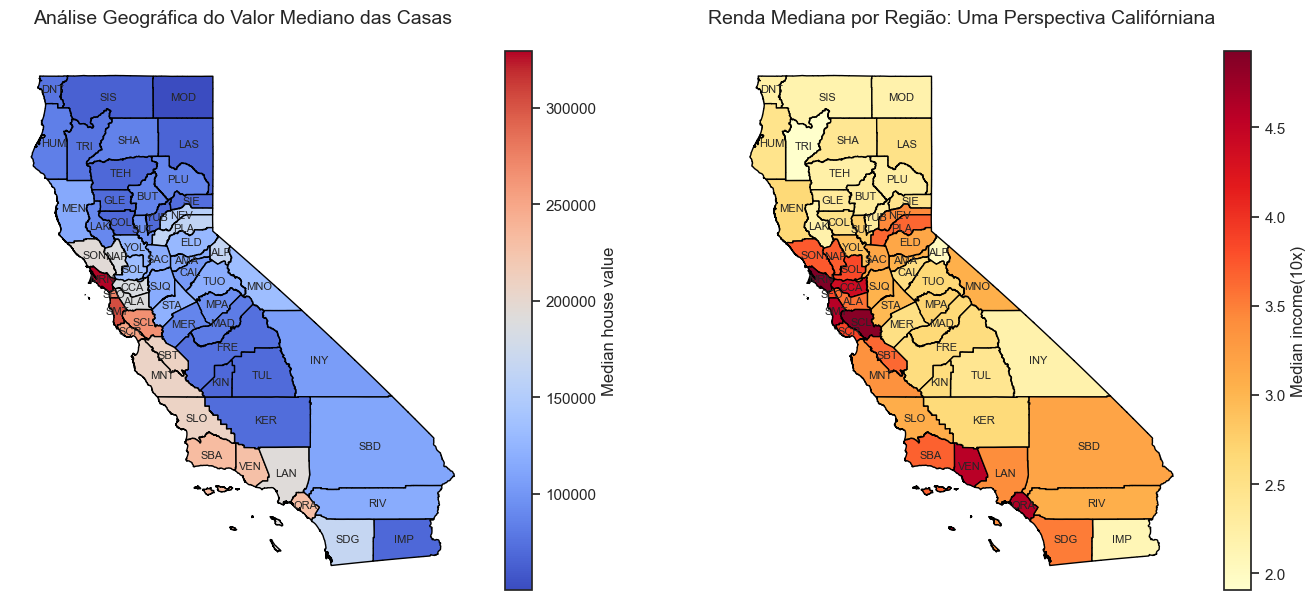

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(17, 7))

gdf_plot = gdf_counties.plot(
    ax=axs[0],
    edgecolor="black",
    column="median_house_value",
    cmap=PALETTE,
    legend=True,
    legend_kwds={"label": "Median house value", "orientation": "vertical"}
)

gdf_counties.plot(
    ax=axs[1],
    edgecolor="black",
    column="median_income",
    cmap="YlOrRd",
    legend=True,
    legend_kwds={"label": "Median income(10x)", "orientation": "vertical"}
)

# Removendo completamente os eixos dos subplots
axs[0].set_axis_off()
axs[1].set_axis_off()

# Adicionando títulos aos gráficos
axs[0].set_title("Análise Geográfica do Valor Mediano das Casas", fontsize=14, pad=20)  
axs[1].set_title("Renda Mediana por Região: Uma Perspectiva Califórniana", fontsize=14, pad=20)

for x, y, abbrev in zip(gdf_counties["centroid"].x, gdf_counties["centroid"].y, gdf_counties["abbrev"]):
    axs[0].text(x, y, abbrev, fontsize=8, ha="center", va="center")
    axs[1].text(x, y, abbrev, fontsize=8, ha="center", va="center")


plt.show()

### **Análise dos gráficos**
 - **Onde o salário é maior, as casas tendem a ser mais caras**: O valor das casas parece refletir diretamente o poder aquisitivo dos residentes. Regiões com maior renda tendem a ter preços mais elevados.
   
 - **Segmentação Geográfica:** Este padrão pode indicar clusters socioeconômicos, onde áreas de alta renda são mais propensas a possuir imóveis com valores altos.

 - **O salário ajuda a prever o preço**: Como a mediana de salários está fortemente correlacionada com a variável alvo ("median_house_value"), ela provavelmente será uma variável preditora importante, contribuindo significativamente para o desempenho do modelo

Os salários mais altos estão diretamente ligados aos preços das casas. Isso acontece porque as pessoas com maior renda conseguem, geralmente pagar mais caro por imóveis.

In [42]:
# Exportando o GeoDF
gdf_counties.to_parquet(DADOS_GEO_MEDIAN)